**Data Engineering Take-Home Assessment**

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this step, I have mounted Google Drive to the Colab environment. Mounting Google Drive allows to access files and directories stored in my Google Drive directly from the Colab notebook

**Data Intake and Cleaning Phase**.  
This phase involves acquiring the raw dataset and performing initial cleaning tasks to ensure data quality and consistency for subsequent analysis.   
Steps Involved:

Data Loading: Load the raw dataset from the specified file path using pandas read_csv function.
Initial Inspection: Perform an initial inspection of the dataset to understand its structure, contents, and potential issues. Display the first few rows of the dataset using the head method.
Handling Missing Values: Identify and handle missing values in the dataset. Calculate the number of missing values for each column using the isnull().sum() method.
Data Type Conversion: Convert relevant columns, such as 'Start Date' and 'End Date', to datetime format using the pd.to_datetime function.
Standardization of Categorical Data: Standardize categorical data, such as the 'Termination Type' column, by filling missing values with 'N/A'.
Duplicate Detection: Check for and remove duplicate records from the dataset using the duplicated().sum() method.

In [ ]:
employees_path = '/content/drive/My Drive/employees.csv'

In [ ]:
import pandas as pd
employees_df = pd.read_csv(employees_path)
employees_df.head()

ID             Name  Start Date    End Date Termination Type  \
0  15759275  Derrick Ramirez  2022-01-03  2022-12-31        Voluntary   
1  19012299     Jill Barajas  2021-07-16         NaN              NaN   
2  63181060       Dawn Jones  2021-06-13  2022-12-26        Voluntary   
3  29101721    Greg Williams  2019-11-15         NaN              NaN   
4  76868411    Stephen Allen  2023-03-17         NaN              NaN   

         Department                Location  
0  Customer Service     New York (New York)  
1  Customer Service    San Jose, California  
2             Sales      New York, New York  
3         Marketing  San Diego (California)  
4         Marketing   California - San Jose

Data Examination and Cleaning

In [ ]:
# Check for missing values
missing_values = employees_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Convert 'Start Date' and 'End Date' to datetime format
employees_df['Start Date'] = pd.to_datetime(employees_df['Start Date'])
employees_df['End Date'] = pd.to_datetime(employees_df['End Date'])

# Standardize 'Termination Type' column
employees_df['Termination Type'] = employees_df['Termination Type'].fillna('N/A')  # Fill missing values with 'N/A'

# Check for duplicates
duplicates = employees_df.duplicated().sum()
print("Duplicates:", duplicates)

# Display cleaned DataFrame
print("Cleaned Employee Information Table:")
employees_df.head()

Missing Values:
 ID                     0
Name                   0
Start Date             0
End Date            5036
Termination Type    5036
Department             0
Location               0
dtype: int64
Duplicates: 5
Cleaned Employee Information Table:


ID             Name Start Date   End Date Termination Type  \
0  15759275  Derrick Ramirez 2022-01-03 2022-12-31        Voluntary   
1  19012299     Jill Barajas 2021-07-16        NaT              N/A   
2  63181060       Dawn Jones 2021-06-13 2022-12-26        Voluntary   
3  29101721    Greg Williams 2019-11-15        NaT              N/A   
4  76868411    Stephen Allen 2023-03-17        NaT              N/A   

         Department                Location  
0  Customer Service     New York (New York)  
1  Customer Service    San Jose, California  
2             Sales      New York, New York  
3         Marketing  San Diego (California)  
4         Marketing   California - San Jose

Similar to the previous step, this phase focuses on loading and cleaning another dataset containing time-series features for states.

Steps Involved:

Data Loading: Load the raw dataset from the specified file path using pandas read_csv function.
Initial Inspection: Perform an initial inspection of the dataset to understand its structure, contents, and potential issues. Display the first few rows of the dataset using the head method.
Handling Missing Values: Identify and handle missing values in the dataset. Calculate the number of missing values for each column using the isnull().sum() method.
Data Type Conversion: Convert relevant columns, such as 'Year', to datetime format using the pd.to_datetime function. Additionally, convert the 'Median House Price' column to numeric format by removing commas and dollar signs and converting to float.
Duplicate Detection: Check for and remove duplicate records from the dataset using the duplicated().sum() method.

In [ ]:
states_path = '/content/drive/My Drive/states_ts.csv'

In [ ]:
states_df = pd.read_csv(states_path)
states_df.head()

State  Year  Population Median House Price  Average Commute Time
0    CA  2019    39195000        $700,000.00                    29
1    CA  2020    39390975        $702,921.00                    31
2    CA  2021    39587929        $693,498.00                    31
3    CA  2022    39785868        $697,120.00                    30
4    CA  2023    39984797        $704,324.00                    29

In [ ]:
# Check for missing values
missing_values = states_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Convert 'Year' to datetime format
states_df['Year'] = pd.to_datetime(states_df['Year'], format='%Y')

# Convert 'Median House Price' to numeric
states_df['Median House Price'] = states_df['Median House Price'].str.replace(',', '').str.replace('$', '').astype(float)

# Check for duplicates
duplicates = states_df.duplicated().sum()
print("Duplicates:", duplicates)

# Display cleaned DataFrame
print("Cleaned State Time Series Features Table:")
states_df.head()

Missing Values:
 State                   0
Year                    0
Population              0
Median House Price      0
Average Commute Time    0
dtype: int64
Duplicates: 0
Cleaned State Time Series Features Table:


<ipython-input-226-af209740f50d>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  states_df['Median House Price'] = states_df['Median House Price'].str.replace(',', '').str.replace('$', '').astype(float)


State       Year  Population  Median House Price  Average Commute Time
0    CA 2019-01-01    39195000            700000.0                    29
1    CA 2020-01-01    39390975            702921.0                    31
2    CA 2021-01-01    39587929            693498.0                    31
3    CA 2022-01-01    39785868            697120.0                    30
4    CA 2023-01-01    39984797            704324.0                    29

In [ ]:
# Check the data type of the 'Median House Price' column
print(states_df['Median House Price'].dtype)

# If the column is not of string type, convert it to string before applying str.replace()
if states_df['Median House Price'].dtype != 'object':
    states_df['Median House Price'] = states_df['Median House Price'].astype(str)

# Perform the replacement
states_df['Median House Price'] = states_df['Median House Price'].str.replace(',', '').str.replace('$', '').astype(float)

float64


<ipython-input-227-241df7e764ec>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  states_df['Median House Price'] = states_df['Median House Price'].str.replace(',', '').str.replace('$', '').astype(float)


In [ ]:
states_df.head()

State       Year  Population  Median House Price  Average Commute Time
0    CA 2019-01-01    39195000            700000.0                    29
1    CA 2020-01-01    39390975            702921.0                    31
2    CA 2021-01-01    39587929            693498.0                    31
3    CA 2022-01-01    39785868            697120.0                    30
4    CA 2023-01-01    39984797            704324.0                    29

This phase involves loading and cleaning a dataset containing static city/state features. The objective is to prepare the dataset for analysis by identifying and addressing any data quality issues.

Steps Involved:

Data Loading: Load the raw dataset from the specified file path using pandas read_csv function.
Initial Inspection: Perform an initial inspection of the dataset to understand its structure, contents, and potential issues. Display the first few rows of the dataset using the head method.
Handling Missing Values: Identify and handle missing values in the dataset. Calculate the number of missing values for each column using the isnull().sum() method.
Data Type Examination: Check the data types of columns in the dataset to ensure they are appropriate for analysis. Use the dtypes attribute to display the data types.
Duplicate Detection: Check for and remove duplicate records from the dataset using the duplicated().sum() method.

In [ ]:
cities_path = '/content/drive/My Drive/cities.csv'

In [ ]:
cities_df = pd.read_csv(cities_path)
cities_df.head()

City       State  Elevation  Latitude  Longitude
0     New York    New York         10   40.7128   -74.0060
1  Los Angeles  California         71   34.0522  -118.2437
2      Chicago    Illinois        176   41.8781   -87.6298
3      Houston       Texas         13   29.7604   -95.3698
4      Phoenix     Arizona        331   33.4484  -112.0740

In [ ]:
# Check for missing values
missing_values = cities_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types
print("Data Types:\n", cities_df.dtypes)

# Check for duplicates
duplicates = cities_df.duplicated().sum()
print("Duplicates:", duplicates)

# Display cleaned DataFrame
print("Cleaned Static City/State Features Table:")
cities_df.head()


Missing Values:
 City         0
State        0
Elevation    0
Latitude     0
Longitude    0
dtype: int64
Data Types:
 City          object
State         object
Elevation      int64
Latitude     float64
Longitude    float64
dtype: object
Duplicates: 0
Cleaned Static City/State Features Table:


City       State  Elevation  Latitude  Longitude
0     New York    New York         10   40.7128   -74.0060
1  Los Angeles  California         71   34.0522  -118.2437
2      Chicago    Illinois        176   41.8781   -87.6298
3      Houston       Texas         13   29.7604   -95.3698
4      Phoenix     Arizona        331   33.4484  -112.0740

In the below step, i tried to load and read all the files from employee_performance folder. As the folder size was huge and I am doing this in Google Collab, My system was crashing while trying to load and read all the csv files from employee_performance folder.

In [ ]:
'''
import os

employee_path = '/content/drive/My Drive/employee_performance'
csv_files = [file for file in os.listdir(employee_path) if file.endswith('.csv')]
'''

"\nimport os\n\nemployee_path = '/content/drive/My Drive/employee_performance'\ncsv_files = [file for file in os.listdir(employee_path) if file.endswith('.csv')]\n"

In [ ]:
'''
import os
import pandas as pd

# Path to the folder containing performance csv files
performance_folder_path = '/content/drive/My Drive/employee_performance/performance_202307.csv'

# List all csv files in the folder
performance_files = [file for file in os.listdir(performance_folder_path) if file.endswith('.csv')]

# Read the first csv file into a dataframe
first_file_path = os.path.join(performance_folder_path, performance_files[0])
first_df = pd.read_csv(first_file_path)

# Display the first DataFrame to confirm structure
print(first_df)

# Assuming 'ID' is the common column in 'employees_df' and performance dataframes
merged_df = employees_df.copy()  # Initialize merged dataframe with employees_df

# Merge first performance dataframe with employees dataframe
merged_df = pd.merge(merged_df, first_df, left_on='ID', right_on='Employee ID', how='left', suffixes=('', f'_{performance_files[0]}'))

# Now loop over and merge the remaining performance dataframes
for file in performance_files[1:]:
    file_path = os.path.join(performance_folder_path, file)
    df = pd.read_csv(file_path)
    # Merge performance dataframe with existing merged dataframe
    merged_df = pd.merge(merged_df, df, left_on='ID', right_on='Employee ID', how='left', suffixes=('', f'_{file}'))

# Display the merged dataframe
print(merged_df.head())

'''




"\nimport os\nimport pandas as pd\n\n# Path to the folder containing performance csv files\nperformance_folder_path = '/content/drive/My Drive/employee_performance/performance_202307.csv'\n\n# List all csv files in the folder\nperformance_files = [file for file in os.listdir(performance_folder_path) if file.endswith('.csv')]\n\n# Read the first csv file into a dataframe\nfirst_file_path = os.path.join(performance_folder_path, performance_files[0])\nfirst_df = pd.read_csv(first_file_path)\n\n# Display the first DataFrame to confirm structure\nprint(first_df)\n\n# Assuming 'ID' is the common column in 'employees_df' and performance dataframes\nmerged_df = employees_df.copy()  # Initialize merged dataframe with employees_df\n\n# Merge first performance dataframe with employees dataframe\nmerged_df = pd.merge(merged_df, first_df, left_on='ID', right_on='Employee ID', how='left', suffixes=('', f'_{performance_files[0]}'))\n\n# Now loop over and merge the remaining performance dataframes\nfo

In [ ]:

'''
import pandas as pd

dfs = {}
for file in csv_files:
    file_path = os.path.join(employee_path, file)
    dfs[file] = pd.read_csv(file_path)
'''

'\nimport pandas as pd\n\ndfs = {}\nfor file in csv_files:\n    file_path = os.path.join(employee_path, file)\n    dfs[file] = pd.read_csv(file_path)\n'

In [ ]:
'''for file_name in dfs.keys():
    print(file_name)
'''

'for file_name in dfs.keys():\n    print(file_name)\n'

In [ ]:
'''
# Loop over performance tables
for file_name, df in dfs.items():
    # Check for missing values
    missing_values = df.isnull().sum()
    print(f"Missing Values for {file_name}:\n", missing_values)

    # Check data types
    print(f"Data Types for {file_name}:\n", df.dtypes)

    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"Duplicates for {file_name}:", duplicates)

    # Display cleaned DataFrame
    print(f"Cleaned {file_name}:")
    print(df.head())
    print("="*50)  # Add a separator line
'''

'\n# Loop over performance tables\nfor file_name, df in dfs.items():\n    # Check for missing values\n    missing_values = df.isnull().sum()\n    print(f"Missing Values for {file_name}:\n", missing_values)\n\n    # Check data types\n    print(f"Data Types for {file_name}:\n", df.dtypes)\n\n    # Check for duplicates\n    duplicates = df.duplicated().sum()\n    print(f"Duplicates for {file_name}:", duplicates)\n\n    # Display cleaned DataFrame\n    print(f"Cleaned {file_name}:")\n    print(df.head())\n    print("="*50)  # Add a separator line\n'

In [ ]:
'''
import pandas as pd
import numpy as np

# Define chunk size
chunk_size = 1000

# Create an empty dataframe to store the merged results
merged_df = pd.DataFrame()

# Merge in batches
for i in range(0, len(dfs), chunk_size):
    chunk_dfs = list(dfs.values())[i:i+chunk_size]  # Get a chunk of performance dataframes
    merged_chunk = employees_df.copy()  # Create a copy of the employees dataframe

    # Merge each performance dataframe in the chunk
    for df in chunk_dfs:
        try:
            month_year = df.columns[0].split('_')[1].split('.')[0]  # Extract month and year from dataframe columns
            merged_chunk = pd.merge(merged_chunk, df, left_on='ID', right_on='Employee ID', how='left', suffixes=('', f'_{month_year}'))
        except (IndexError, AttributeError):
            continue

    # Concatenate the merged chunk with the overall merged dataframe
    merged_df = pd.concat([merged_df, merged_chunk], ignore_index=True)

# Display the merged dataframe
merged_df.head()
'''



"\nimport pandas as pd\nimport numpy as np\n\n# Define chunk size\nchunk_size = 1000\n\n# Create an empty dataframe to store the merged results\nmerged_df = pd.DataFrame()\n\n# Merge in batches\nfor i in range(0, len(dfs), chunk_size):\n    chunk_dfs = list(dfs.values())[i:i+chunk_size]  # Get a chunk of performance dataframes\n    merged_chunk = employees_df.copy()  # Create a copy of the employees dataframe\n\n    # Merge each performance dataframe in the chunk\n    for df in chunk_dfs:\n        try:\n            month_year = df.columns[0].split('_')[1].split('.')[0]  # Extract month and year from dataframe columns\n            merged_chunk = pd.merge(merged_chunk, df, left_on='ID', right_on='Employee ID', how='left', suffixes=('', f'_{month_year}'))\n        except (IndexError, AttributeError):\n            continue\n\n    # Concatenate the merged chunk with the overall merged dataframe\n    merged_df = pd.concat([merged_df, merged_chunk], ignore_index=True)\n\n# Display the merged 

In this phase, performance data for employees is loaded from multiple CSV files, cleaned, and combined into a single DataFrame for further analysis. The goal is to prepare the performance dataset for subsequent processing and modeling tasks.
Note and Assumptions made: I used only four files from the employee performance folder. due to time and memory constraints

Steps Involved:

Data Loading: Load performance data from multiple CSV files into separate DataFrames using pandas read_csv function.
Initial Inspection: Perform an initial inspection of each DataFrame to understand its structure, contents, and potential issues. Display the first few rows of each DataFrame using the head method.
Data Concatenation: Concatenate the individual DataFrames vertically to combine all performance data into a single DataFrame using the concat function.

In [ ]:
import pandas as pd

# Path to the performance csv file
performance_file_path = '/content/drive/My Drive/employee_performance/performance_202307.csv'

# Read the performance csv file into a DataFrame
performance_df = pd.read_csv(performance_file_path)

performance_df.head()


Employee ID  Schedule Adherence  Schedule Variability  Error Rate  \
0     19012299                0.66                  0.73        0.55   
1     29101721                0.74                  0.89        0.38   
2     76868411                0.76                  0.82        0.68   
3     95028633                0.62                  0.73        0.87   
4     32275632                0.52                  0.65        0.32   

   Performance Score  
0               0.78  
1               0.83  
2               0.84  
3               0.72  
4               0.84

In [ ]:
performance_file_path1 = '/content/drive/My Drive/employee_performance/performance_202010.csv'
# Read the performance csv file into a DataFrame
performance_df1 = pd.read_csv(performance_file_path1)

In [ ]:
performance_df1.head()

Employee ID  Schedule Adherence  Schedule Variability  Error Rate  \
0     29101721                0.85                  0.79        0.55   
1     32275632                0.70                  0.78        0.71   
2     30742312                0.75                  0.83        0.62   
3      4241082                0.76                  0.62        0.57   
4      9101847                0.72                  0.87        0.76   

   Performance Score  
0               0.76  
1               0.66  
2               0.61  
3               0.71  
4               0.63

In [ ]:
performance_file_path2 = '/content/drive/My Drive/employee_performance/performance_202207.csv'
# Read the performance csv file into a DataFrame
performance_df2 = pd.read_csv(performance_file_path2)

performance_file_path3 = '/content/drive/My Drive/employee_performance/performance_201906.csv'
# Read the performance csv file into a DataFrame
performance_df3 = pd.read_csv(performance_file_path3)

In [ ]:
# Concatenate performance_df and performance_df1 vertically

combined_performance_df = pd.concat([performance_df, performance_df1, performance_df2,performance_df3], axis=0, ignore_index=True)

In [ ]:
combined_performance_df.head()

Employee ID  Schedule Adherence  Schedule Variability  Error Rate  \
0     19012299                0.66                  0.73        0.55   
1     29101721                0.74                  0.89        0.38   
2     76868411                0.76                  0.82        0.68   
3     95028633                0.62                  0.73        0.87   
4     32275632                0.52                  0.65        0.32   

   Performance Score  
0               0.78  
1               0.83  
2               0.84  
3               0.72  
4               0.84

In [ ]:
cities_df.head()

City       State  Elevation  Latitude  Longitude
0     New York    New York         10   40.7128   -74.0060
1  Los Angeles  California         71   34.0522  -118.2437
2      Chicago    Illinois        176   41.8781   -87.6298
3      Houston       Texas         13   29.7604   -95.3698
4      Phoenix     Arizona        331   33.4484  -112.0740

In [ ]:
states_df.head()

State       Year  Population  Median House Price  Average Commute Time
0    CA 2019-01-01    39195000            700000.0                    29
1    CA 2020-01-01    39390975            702921.0                    31
2    CA 2021-01-01    39587929            693498.0                    31
3    CA 2022-01-01    39785868            697120.0                    30
4    CA 2023-01-01    39984797            704324.0                    29

In [ ]:
employees_df.head()

ID             Name Start Date   End Date Termination Type  \
0  15759275  Derrick Ramirez 2022-01-03 2022-12-31        Voluntary   
1  19012299     Jill Barajas 2021-07-16        NaT              N/A   
2  63181060       Dawn Jones 2021-06-13 2022-12-26        Voluntary   
3  29101721    Greg Williams 2019-11-15        NaT              N/A   
4  76868411    Stephen Allen 2023-03-17        NaT              N/A   

         Department                Location  
0  Customer Service     New York (New York)  
1  Customer Service    San Jose, California  
2             Sales      New York, New York  
3         Marketing  San Diego (California)  
4         Marketing   California - San Jose

**Data Integration Phase**

In the Data Integration Phase, the cleaned employee data, performance data, city information, and state time series features are merged into a single DataFrame. This integration process combines relevant information from different sources to create a comprehensive dataset for analysis and modeling.   

Steps Involved:

Merging with Performance Data: Merge the employee DataFrame with the combined performance DataFrame based on the common identifier 'ID' and 'Employee ID' columns.
Merging with City Information: Further merge the resulting DataFrame with city information from the cities DataFrame based on the common 'Location' and 'City' columns.
Merging with State Time Series Features: Lastly, merge the DataFrame with state time series features from the states DataFrame based on the common 'Location' and 'State' columns.

In [ ]:
merged_df = employees_df.merge(combined_performance_df, left_on='ID', right_on='Employee ID', how='left')

In [ ]:
merged_df.head()

ID             Name Start Date   End Date Termination Type  \
0  15759275  Derrick Ramirez 2022-01-03 2022-12-31        Voluntary   
1  19012299     Jill Barajas 2021-07-16        NaT              N/A   
2  19012299     Jill Barajas 2021-07-16        NaT              N/A   
3  63181060       Dawn Jones 2021-06-13 2022-12-26        Voluntary   
4  29101721    Greg Williams 2019-11-15        NaT              N/A   

         Department                Location  Employee ID  Schedule Adherence  \
0  Customer Service     New York (New York)   15759275.0                0.59   
1  Customer Service    San Jose, California   19012299.0                0.66   
2  Customer Service    San Jose, California   19012299.0                0.73   
3             Sales      New York, New York   63181060.0                0.58   
4         Marketing  San Diego (California)   29101721.0                0.74   

   Schedule Variability  Error Rate  Performance Score  
0                  0.77        0.64               0.86  
1                  0.73        0.55               0.78  
2                  0.71        0.71               0.81  
3                  0.80        0.73               0.67  
4                  0.89        0.38               0.83

In [ ]:
merged_df.columns

Index(['ID', 'Name', 'Start Date', 'End Date', 'Termination Type',
       'Department', 'Location', 'Employee ID', 'Schedule Adherence',
       'Schedule Variability', 'Error Rate', 'Performance Score'],
      dtype='object')

In [ ]:
# Merging with cities_df
merged_df = pd.merge(merged_df, cities_df, left_on='Location', right_on='City', how='left')

# Merging with states_df
merged_df = pd.merge(merged_df, states_df, left_on='Location', right_on='State', how='left')

In [ ]:
merged_df.head()


ID             Name Start Date   End Date Termination Type  \
0  15759275  Derrick Ramirez 2022-01-03 2022-12-31        Voluntary   
1  19012299     Jill Barajas 2021-07-16        NaT              N/A   
2  19012299     Jill Barajas 2021-07-16        NaT              N/A   
3  63181060       Dawn Jones 2021-06-13 2022-12-26        Voluntary   
4  29101721    Greg Williams 2019-11-15        NaT              N/A   

         Department                Location  Employee ID  Schedule Adherence  \
0  Customer Service     New York (New York)   15759275.0                0.59   
1  Customer Service    San Jose, California   19012299.0                0.66   
2  Customer Service    San Jose, California   19012299.0                0.73   
3             Sales      New York, New York   63181060.0                0.58   
4         Marketing  San Diego (California)   29101721.0                0.74   

   Schedule Variability  ...  City  State_x Elevation Latitude  Longitude  \
0                  0.77  ...   NaN      NaN       NaN      NaN        NaN   
1                  0.73  ...   NaN      NaN       NaN      NaN        NaN   
2                  0.71  ...   NaN      NaN       NaN      NaN        NaN   
3                  0.80  ...   NaN      NaN       NaN      NaN        NaN   
4                  0.89  ...   NaN      NaN       NaN      NaN        NaN   

   State_y  Year Population Median House Price  Average Commute Time  
0      NaN   NaT        NaN                NaN                   NaN  
1      NaN   NaT        NaN                NaN                   NaN  
2      NaN   NaT        NaN                NaN                   NaN  
3      NaN   NaT        NaN                NaN                   NaN  
4      NaN   NaT        NaN                NaN                   NaN  

[5 rows x 22 columns]

In [ ]:
merged_df.columns

Index(['ID', 'Name', 'Start Date', 'End Date', 'Termination Type',
       'Department', 'Location', 'Employee ID', 'Schedule Adherence',
       'Schedule Variability', 'Error Rate', 'Performance Score', 'City',
       'State_x', 'Elevation', 'Latitude', 'Longitude', 'State_y', 'Year',
       'Population', 'Median House Price', 'Average Commute Time'],
      dtype='object')

In [ ]:
# Suppose you want to remove the column 'column_name'
merged_df.drop(columns=['Employee ID'], inplace=True)


**Data Processing Phase**

Feature Engineering.  
Feature engineering involves creating new features or transforming existing ones to extract relevant information and improve the predictive power of the dataset. In this phase, we compute employee tenure as a new feature to capture the duration of employment for each employee.

Step 1: Compute Employee Tenure

Calculate the tenure of each employee by subtracting their start date from the current date (assumed to be December 31, 2023) and converting the result to years. This feature engineering step enhances the dataset by incorporating employee tenure as a predictive feature, contributing to a more comprehensive analysis of turnover dynamics.

In [ ]:
# Calculate current date for each row (assuming it's December 2023)
current_date = pd.to_datetime('2023-12-31')

# Compute tenure
merged_df['Tenure'] = (current_date - merged_df['Start Date']).dt.days / 365.25


Step 2: Create Labels for Voluntary Turnover

In this step, we create binary labels to classify employees into voluntary turnover and non-voluntary turnover categories. This helps to define the target variable for predictive modeling tasks.

Steps Involved:

Create Labels for Voluntary Turnover: Generate binary labels indicating whether an employee experienced voluntary turnover within the next month. This is determined by matching the termination type with "Voluntary" and checking if the end date is one month ahead of the current date (assumed to be December 31, 2023). By creating binary labels for voluntary turnover, we establish a clear target variable for predictive modeling, facilitating the development of accurate turnover prediction models

In [ ]:
# Create binary label for voluntary turnover
merged_df['Voluntary Turnover'] = ((merged_df['Termination Type'] == 'Voluntary') &
                                   (merged_df['End Date'] == current_date + pd.DateOffset(months=1)))


In [ ]:
merged_df.head()

ID             Name Start Date   End Date Termination Type  \
0  15759275  Derrick Ramirez 2022-01-03 2022-12-31        Voluntary   
1  19012299     Jill Barajas 2021-07-16        NaT              N/A   
2  19012299     Jill Barajas 2021-07-16        NaT              N/A   
3  63181060       Dawn Jones 2021-06-13 2022-12-26        Voluntary   
4  29101721    Greg Williams 2019-11-15        NaT              N/A   

         Department                Location  Schedule Adherence  \
0  Customer Service     New York (New York)                0.59   
1  Customer Service    San Jose, California                0.66   
2  Customer Service    San Jose, California                0.73   
3             Sales      New York, New York                0.58   
4         Marketing  San Diego (California)                0.74   

   Schedule Variability  Error Rate  ...  Elevation Latitude Longitude  \
0                  0.77        0.64  ...        NaN      NaN       NaN   
1                  0.73        0.55  ...        NaN      NaN       NaN   
2                  0.71        0.71  ...        NaN      NaN       NaN   
3                  0.80        0.73  ...        NaN      NaN       NaN   
4                  0.89        0.38  ...        NaN      NaN       NaN   

   State_y  Year  Population Median House Price Average Commute Time  \
0      NaN   NaT         NaN                NaN                  NaN   
1      NaN   NaT         NaN                NaN                  NaN   
2      NaN   NaT         NaN                NaN                  NaN   
3      NaN   NaT         NaN                NaN                  NaN   
4      NaN   NaT         NaN                NaN                  NaN   

     Tenure  Voluntary Turnover  
0  1.990418               False  
1  2.458590               False  
2  2.458590               False  
3  2.548939               False  
4  4.125941               False  

[5 rows x 23 columns]

In [ ]:
merged_df.columns

Index(['ID', 'Name', 'Start Date', 'End Date', 'Termination Type',
       'Department', 'Location', 'Schedule Adherence', 'Schedule Variability',
       'Error Rate', 'Performance Score', 'City', 'State_x', 'Elevation',
       'Latitude', 'Longitude', 'State_y', 'Year', 'Population',
       'Median House Price', 'Average Commute Time', 'Tenure',
       'Voluntary Turnover'],
      dtype='object')

Step 3: Create Lag Features

In this step, lag features are created to capture the historical performance trends of employees. These lag features provide additional context for predictive modeling tasks by incorporating past performance metrics.

Steps Involved:

Create Lag Features: Group the data by Employee ID and calculate rolling mean values for key performance metrics over a defined window. These lag features represent the average performance trends of each employee over the preceding months. By creating lag features based on rolling mean calculations, we enrich the dataset with valuable historical performance information, enhancing the predictive capabilities of our models.

In [ ]:
# Group by Employee ID and calculate rolling mean for performance metrics
performance_metrics = ['Schedule Adherence', 'Schedule Variability', 'Error Rate', 'Performance Score']
merged_df[performance_metrics] = merged_df.groupby('ID')[performance_metrics].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


Step 4. Create Percentile in Department Features

In this step, percentile features are created to quantify the relative performance and tenure of employees within their respective departments. These percentile features provide insights into individual performance rankings and tenure distributions within each department.

Steps Involved:

Create Percentile in Department Features: Group the data by Department and calculate the percentile rank for key performance metrics and tenure. These percentile features represent the relative standing of employees in terms of performance and tenure compared to their department peers. By creating percentile features based on departmental rankings, we gain insights into the relative standing of employees within their departments, facilitating more informed assessments of individual performance and tenure dynamics.

In [ ]:
# Group by Department and calculate percentile rank
percentile_cols = performance_metrics + ['Tenure']  # Include performance metrics and tenure for percentile calculation
merged_df[percentile_cols] = merged_df.groupby('Department')[percentile_cols].transform(lambda x: x.rank(pct=True))


In [ ]:
merged_df.head()

ID             Name Start Date   End Date Termination Type  \
0  15759275  Derrick Ramirez 2022-01-03 2022-12-31        Voluntary   
1  19012299     Jill Barajas 2021-07-16        NaT              N/A   
2  19012299     Jill Barajas 2021-07-16        NaT              N/A   
3  63181060       Dawn Jones 2021-06-13 2022-12-26        Voluntary   
4  29101721    Greg Williams 2019-11-15        NaT              N/A   

         Department                Location  Schedule Adherence  \
0  Customer Service     New York (New York)            0.168672   
1  Customer Service    San Jose, California            0.416366   
2  Customer Service    San Jose, California            0.583634   
3             Sales      New York, New York            0.143830   
4         Marketing  San Diego (California)            0.760806   

   Schedule Variability  Error Rate  ...  Elevation Latitude Longitude  \
0              0.563779    0.763137  ...        NaN      NaN       NaN   
1              0.366225    0.537505  ...        NaN      NaN       NaN   
2              0.312074    0.746691  ...        NaN      NaN       NaN   
3              0.738782    0.898438  ...        NaN      NaN       NaN   
4              0.977339    0.139110  ...        NaN      NaN       NaN   

   State_y  Year  Population Median House Price Average Commute Time  \
0      NaN   NaT         NaN                NaN                  NaN   
1      NaN   NaT         NaN                NaN                  NaN   
2      NaN   NaT         NaN                NaN                  NaN   
3      NaN   NaT         NaN                NaN                  NaN   
4      NaN   NaT         NaN                NaN                  NaN   

     Tenure  Voluntary Turnover  
0  0.267116               False  
1  0.352524               False  
2  0.352524               False  
3  0.362711               False  
4  0.714935               False  

[5 rows x 23 columns]

In this step, the categorical label indicating voluntary turnover is converted into a numerical format (0 or 1). This transformation enables the use of the label in machine learning models that require numerical inputs, facilitating the prediction of employee turnover based on the engineered features.

Steps Involved:

Convert 'Voluntary Turnover' to Numerical: Transform the categorical 'Voluntary Turnover' label into a binary numerical format, where 0 represents no turnover and 1 represents voluntary turnover. This conversion prepares the label for utilization in machine learning algorithms for classification tasks. By converting the turnover label to a numerical format, we facilitate its utilization in predictive modeling frameworks, enabling the development of robust turnover prediction models based on the engineered features.

In [ ]:
# Convert 'Voluntary Turnover' to numerical (0 or 1)
merged_df['Voluntary Turnover'] = merged_df['Voluntary Turnover'].astype(int)

Model Input Preparation Phase

Predictive Modeling
The objective of this phase is to prepare the dataset for predictive modeling by encoding categorical variables, imputing missing values, performing feature engineering if needed, and splitting the dataset into training, validation, and test sets.

Dataset Partitioning
The dataset is partitioned into three subsets:

Training set: Used to train the machine learning models.
Validation set: Employed for hyperparameter tuning and model selection.
Test set: Utilized to evaluate the final model's performance on unseen data.
Steps Involved:   

Convert Categorical Variables to Numerical Representation:
Encode categorical variables such as 'Termination Type', 'Department', and 'Location' into numerical format using label encoding. This transformation enables the utilization of categorical variables in machine learning algorithms.   
Impute Missing Values:
Impute missing values in numerical columns with the mean and in categorical columns with the mode. This ensures that the dataset is complete and ready for modeling.   
Perform Feature Engineering (Optional):
Conduct feature engineering to create new features that may improve the predictive performance of the models. For example, the length of employee names ('Name_Length') could be computed as a new feature.   
Convert Categorical Variables into Numerical Representations (if needed):
Further convert categorical variables into numerical representations, such as one-hot encoding, if required by the modeling algorithm. This step ensures that all features are in numerical format, which is necessary for most machine learning models.   
Data Splitting:
Split the dataset into training, validation, and test sets using the train_test_split function from scikit-learn. This division ensures that the models are trained on one subset, validated on another, and tested on a separate unseen subset to assess generalization performance.

By completing the model input preparation phase, the dataset is now ready for training and evaluating machine learning models to predict employee turnover.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Convert 'Termination Type' to numerical using Label Encoding
label_encoder = LabelEncoder()
merged_df['Termination Type'] = label_encoder.fit_transform(merged_df['Termination Type'])

# Convert 'Department' to numerical using Label Encoding
merged_df['Department'] = label_encoder.fit_transform(merged_df['Department'])

# Extract city/state from 'Location' and convert to numerical using Label Encoding
merged_df['Location'] = merged_df['Location'].str.split(',').str[-1]  # Extracting state
merged_df['Location'] = label_encoder.fit_transform(merged_df['Location'])

# Convert 'Start Date' and 'End Date' to numerical (e.g., duration of employment)
merged_df['Start Date'] = pd.to_datetime(merged_df['Start Date'])
merged_df['End Date'] = pd.to_datetime(merged_df['End Date'])
merged_df['Employment Duration'] = (merged_df['End Date'] - merged_df['Start Date']).dt.days
merged_df.drop(['Start Date', 'End Date'], axis=1, inplace=True)

# Ensure 'Schedule Adherence' and 'Schedule Variability' are in numerical format
merged_df['Schedule Adherence'] = merged_df['Schedule Adherence'].astype(float)
merged_df['Schedule Variability'] = merged_df['Schedule Variability'].astype(float)

In [ ]:
merged_df.columns

Index(['ID', 'Name', 'Termination Type', 'Department', 'Location',
       'Schedule Adherence', 'Schedule Variability', 'Error Rate',
       'Performance Score', 'City', 'State_x', 'Elevation', 'Latitude',
       'Longitude', 'State_y', 'Year', 'Population', 'Median House Price',
       'Average Commute Time', 'Tenure', 'Voluntary Turnover',
       'Employment Duration'],
      dtype='object')

In [ ]:
merged_df.head()

ID             Name  Termination Type  Department  Location  \
0  15759275  Derrick Ramirez                 2           1        32   
1  19012299     Jill Barajas                 1           1         3   
2  19012299     Jill Barajas                 1           1         3   
3  63181060       Dawn Jones                 2           5         7   
4  29101721    Greg Williams                 1           4        43   

   Schedule Adherence  Schedule Variability  Error Rate  Performance Score  \
0            0.168672              0.563779    0.763137           0.918973   
1            0.416366              0.366225    0.537505           0.631769   
2            0.583634              0.312074    0.746691           0.703169   
3            0.143830              0.738782    0.898438           0.163261   
4            0.760806              0.977339    0.139110           0.830466   

  City  ... Latitude  Longitude  State_y  Year Population Median House Price  \
0  NaN  ...      NaN        NaN      NaN   NaT        NaN                NaN   
1  NaN  ...      NaN        NaN      NaN   NaT        NaN                NaN   
2  NaN  ...      NaN        NaN      NaN   NaT        NaN                NaN   
3  NaN  ...      NaN        NaN      NaN   NaT        NaN                NaN   
4  NaN  ...      NaN        NaN      NaN   NaT        NaN                NaN   

   Average Commute Time    Tenure  Voluntary Turnover  Employment Duration  
0                   NaN  0.267116                   0                362.0  
1                   NaN  0.352524                   0                  NaN  
2                   NaN  0.352524                   0                  NaN  
3                   NaN  0.362711                   0                561.0  
4                   NaN  0.714935                   0                  NaN  

[5 rows x 22 columns]

In [ ]:
import pandas as pd
import numpy as np



# Step 1: Remove columns with more than 90% missing values
missing_threshold = 0.9
columns_to_drop = merged_df.columns[merged_df.isnull().mean() > missing_threshold]
merged_df.drop(columns=columns_to_drop, inplace=True)

# Step 2: Impute missing values for remaining columns
# Assuming imputation with mean for numerical columns and mode for categorical columns
numerical_cols = merged_df.select_dtypes(include=np.number).columns
categorical_cols = merged_df.select_dtypes(exclude=np.number).columns

from sklearn.impute import SimpleImputer

# Impute numerical columns with mean
imputer_numerical = SimpleImputer(strategy='mean')
merged_df[numerical_cols] = imputer_numerical.fit_transform(merged_df[numerical_cols])

# Impute categorical columns with mode
imputer_categorical = SimpleImputer(strategy='most_frequent')
merged_df[categorical_cols] = imputer_categorical.fit_transform(merged_df[categorical_cols])

# Step 5: Data Splitting
# Split the dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['Voluntary Turnover'])  # Features
y = merged_df['Voluntary Turnover']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)  # 0.25 x 0.8 = 0.2



In [ ]:
X

ID              Name  Termination Type  Department  Location  \
0      15759275.0   Derrick Ramirez               2.0         1.0      32.0   
1      19012299.0      Jill Barajas               1.0         1.0       3.0   
2      19012299.0      Jill Barajas               1.0         1.0       3.0   
3      63181060.0        Dawn Jones               2.0         5.0       7.0   
4      29101721.0     Greg Williams               1.0         4.0      43.0   
...           ...               ...               ...         ...       ...   
17267  11631698.0  Vanessa Hatfield               1.0         4.0       4.0   
17268  11631698.0  Vanessa Hatfield               1.0         4.0       4.0   
17269  92323370.0       Angela Beck               1.0         3.0      38.0   
17270  92323370.0       Angela Beck               1.0         3.0      38.0   
17271  92323370.0       Angela Beck               1.0         3.0      38.0   

       Schedule Adherence  Schedule Variability  Error Rate  \
0                0.168672              0.563779    0.763137   
1                0.416366              0.366225    0.537505   
2                0.583634              0.312074    0.746691   
3                0.143830              0.738782    0.898438   
4                0.760806              0.977339    0.139110   
...                   ...                   ...         ...   
17267            0.252413              0.794587    0.383340   
17268            0.489299              0.643726    0.514058   
17269            0.493952              0.352321    0.212056   
17270            0.444011              0.150800    0.682794   
17271            0.602029              0.251658    0.518728   

       Performance Score    Tenure  Employment Duration  
0               0.918973  0.267116           362.000000  
1               0.631769  0.352524           596.766185  
2               0.703169  0.352524           596.766185  
3               0.163261  0.362711           561.000000  
4               0.830466  0.714935           596.766185  
...                  ...       ...                  ...  
17267           0.684222  0.434230           596.766185  
17268           0.484054  0.434230           596.766185  
17269           0.284237  0.555088           596.766185  
17270           0.184744  0.555088           596.766185  
17271           0.452985  0.555088           596.766185  

[17272 rows x 11 columns]

**Analysis Phase**

Step 1: Data Slices

Data slicing involves dividing the dataset into meaningful subsets to perform separate analyses based on specific criteria. This step allows for a more focused examination of the data, enabling insights at both the aggregate and departmental levels.

All Employees Slice:
The entire dataset is preserved in the all_employees_slice subset, representing all employees irrespective of department affiliation. This slice provides a comprehensive view of the organization's workforce, allowing for analyses that consider the entire employee population.   
By Department Slices:
The dataset is further segmented into separate slices based on departmental affiliation using the groupby function. Each department's data is stored in a dedicated dictionary, department_slices, with the department name as the key and the corresponding subset as the value. This facilitates department-specific analyses and comparisons.

By creating data slices, analysts can conduct nuanced analyses that address the unique characteristics and challenges of different segments within the organization, ultimately leading to more informed decision-making and strategic planning.

In [ ]:
# All Employees
all_employees_slice = merged_df.copy()

# By Department
department_slices = {}
for department, data in merged_df.groupby('Department'):
    department_slices[department] = data.copy()


Step 2: Output Subdirectory Creation

Creating output subdirectories is essential for organizing analysis results and ensuring easy access to generated outputs. Each data slice, whether representing the entire workforce or individual departments, should have its dedicated directory within the overarching output directory.   

Output Directory Structure:
output: Root directory for all analysis outputs.   
Department_Slice1: Subdirectory for the first department's analysis results.   
Department_Slice2: Subdirectory for the second department's analysis results.   
...   
Department_SliceN: Subdirectory for the Nth department's analysis results.

By establishing a well-structured output directory, analysts can streamline the process of storing and accessing analysis outputs, fostering a more organized and efficient workflow.

In [ ]:
import os

# Create the 'output' directory if it doesn't exist
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create subdirectories for each data slice
for name, data in department_slices.items():
    subdir_name = os.path.join(output_dir, f'{name}_Department')
    if not os.path.exists(subdir_name):
        os.makedirs(subdir_name)


Step 3: Correlation Analysis.  
Correlation analysis provides insights into the relationships between features and the target variable (voluntary turnover), helping identify factors strongly associated with turnover.   
Benefits:
Identifies features with significant influence on turnover, aiding in feature selection and model interpretation.   
Facilitates a deeper understanding of the dataset's dynamics and potential predictors of turnover.

In [ ]:
correlation_results = {}

# Compute correlation for all employees
correlation_results['All Employees'] = all_employees_slice.drop(columns=['Voluntary Turnover']).corrwith(all_employees_slice['Voluntary Turnover'])

# Compute correlation for each department
for department, data in department_slices.items():
    correlation_results[department] = data.drop(columns=['Voluntary Turnover']).corrwith(data['Voluntary Turnover'])


<ipython-input-274-84475c77e7c5>:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_results['All Employees'] = all_employees_slice.drop(columns=['Voluntary Turnover']).corrwith(all_employees_slice['Voluntary Turnover'])
<ipython-input-274-84475c77e7c5>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_results[department] = data.drop(columns=['Voluntary Turnover']).corrwith(data['Voluntary Turnover'])
<ipython-input-274-84475c77e7c5>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of nu

Visualize correlation values as bar charts

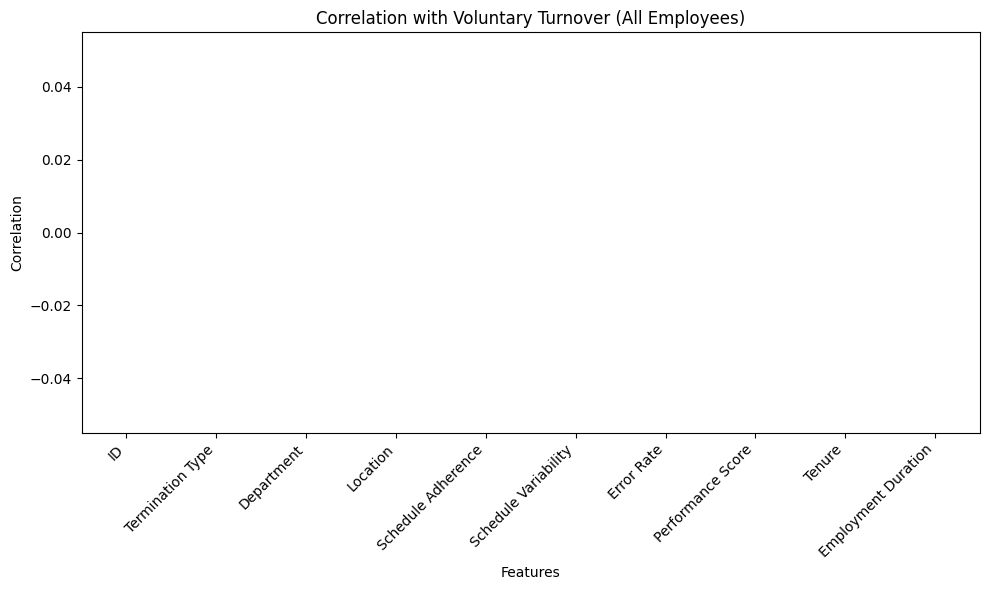

In [ ]:
import matplotlib.pyplot as plt

# Extract correlation values
correlation_values = correlation_results['All Employees']

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_values.plot(kind='bar')
plt.title('Correlation with Voluntary Turnover (All Employees)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


it's possible that the correlation values are all zeros or very close to zero, indicating a weak linear relationship between the features and the target variable.

In [ ]:
print(correlation_values)

ID                     NaN
Termination Type       NaN
Department             NaN
Location               NaN
Schedule Adherence     NaN
Schedule Variability   NaN
Error Rate             NaN
Performance Score      NaN
Tenure                 NaN
Employment Duration    NaN
dtype: float64


In [ ]:
print(all_employees_slice['Voluntary Turnover'].isnull().sum())
print(all_employees_slice.drop(columns=['Voluntary Turnover']).isnull().sum())


0
ID                      0
Name                    0
Termination Type        0
Department              0
Location                0
Schedule Adherence      0
Schedule Variability    0
Error Rate              0
Performance Score       0
Tenure                  0
Employment Duration     0
dtype: int64


Visualize distributions of features and target variable

<Figure size 1200x800 with 0 Axes>

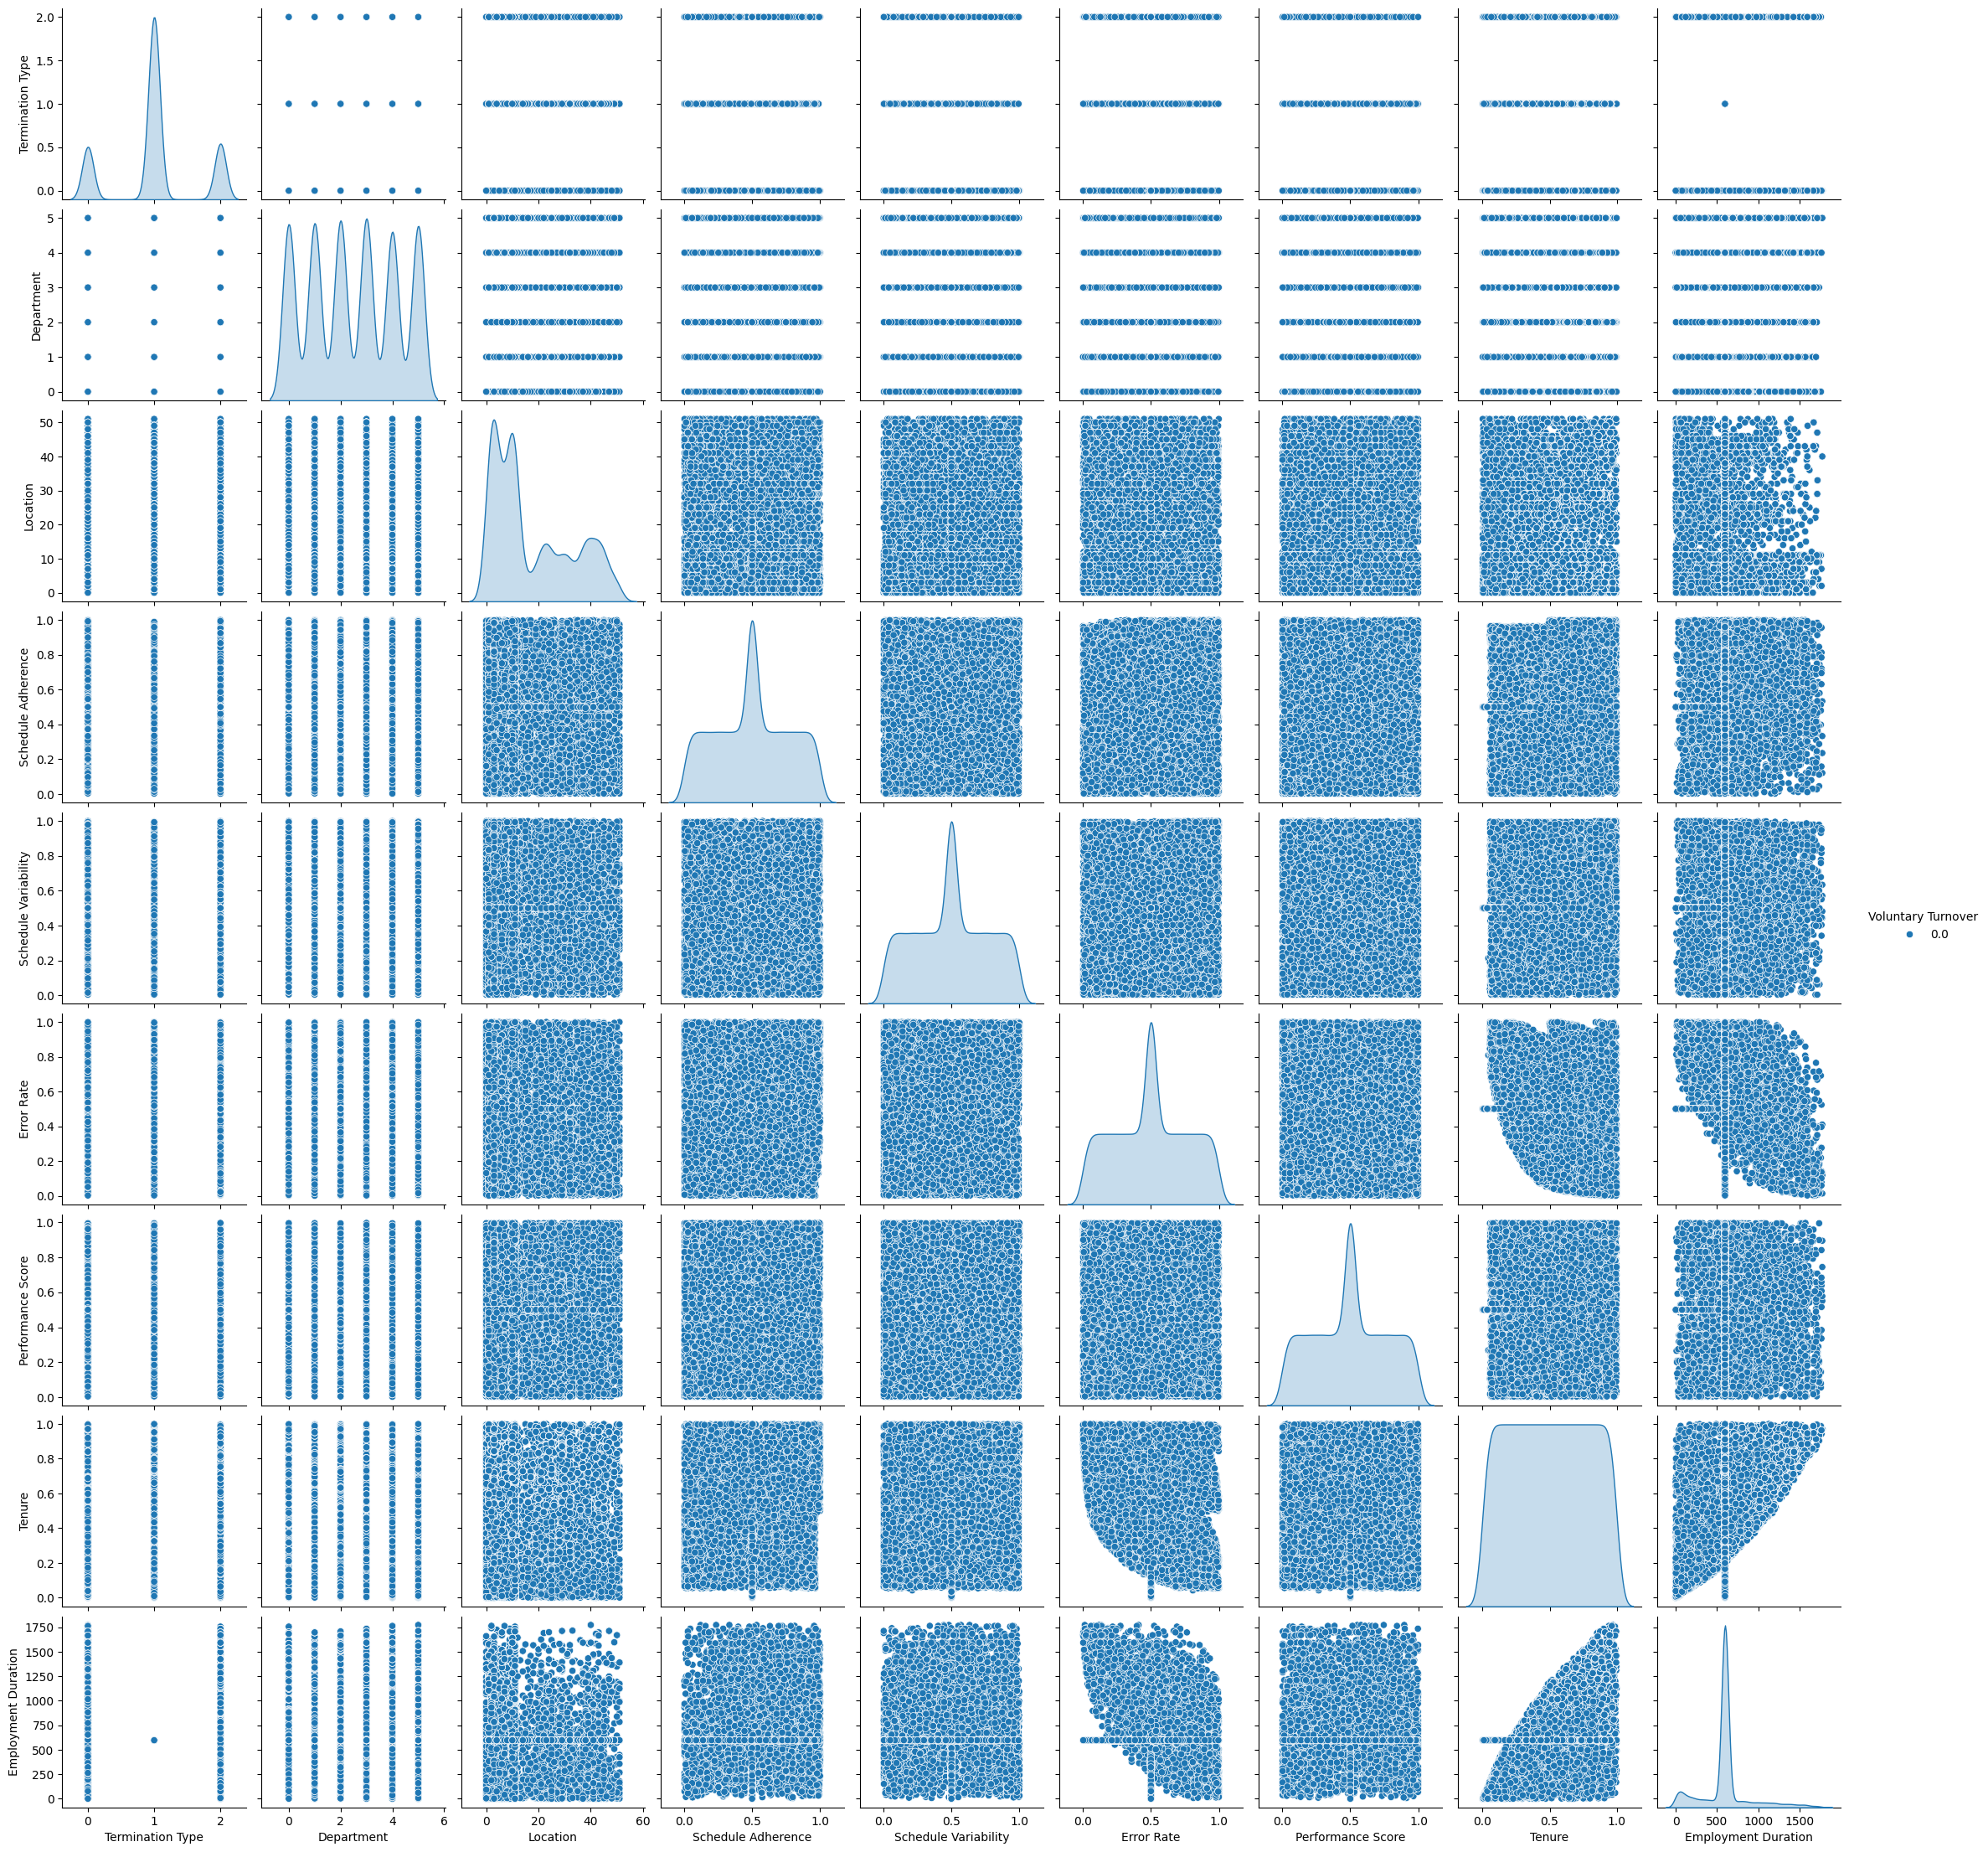

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions of features and target variable
plt.figure(figsize=(12, 8))
sns.pairplot(all_employees_slice.drop(columns=['ID', 'Name']), hue='Voluntary Turnover', diag_kind='kde')
plt.show()


Step 4: Monthly Turnover Rate Over Time.  
In this step, we calculate the monthly turnover rate over time for both the entire workforce and each department individually. By analyzing turnover rates over time, we can identify trends and patterns in employee attrition, which can provide insights into potential underlying factors contributing to turnover.

Benefits:   
Reveals seasonal trends and patterns in turnover, allowing for proactive workforce management strategies.   
Enables comparisons of turnover dynamics across different departments, aiding in targeted interventions and resource allocation.

<ipython-input-287-1f520d714bba>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_turnover_rate = df.resample('M').mean()['Voluntary Turnover']


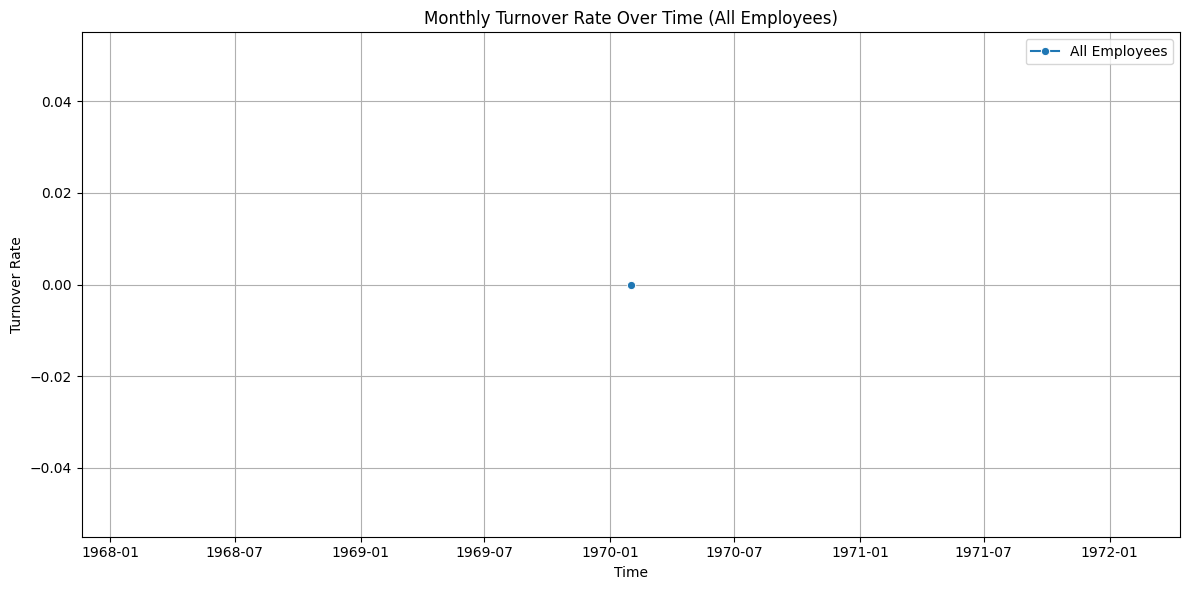

<ipython-input-287-1f520d714bba>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_turnover_rate = df.resample('M').mean()['Voluntary Turnover']
<ipython-input-287-1f520d714bba>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_turnover_rate = df.resample('M').mean()['Voluntary Turnover']
<ipython-input-287-1f520d714bba>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_turnover_rate = df.resam

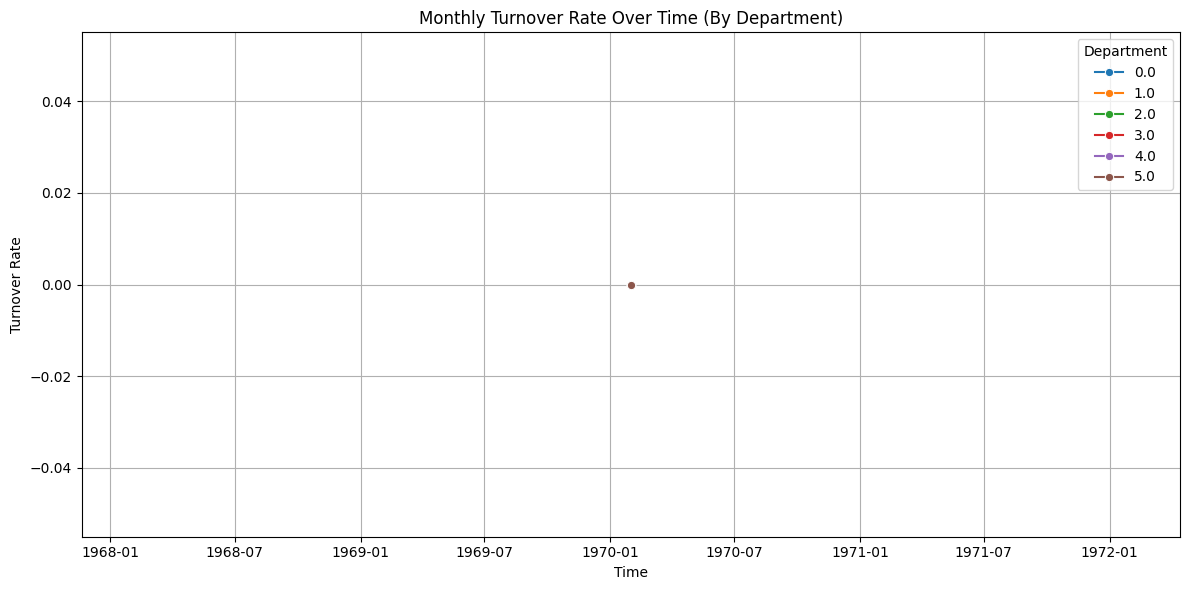

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate monthly turnover rate
def calculate_monthly_turnover_rate(df):
    # Convert the date column to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)
    # Group by month and calculate turnover rate
    monthly_turnover_rate = df.resample('M').mean()['Voluntary Turnover']
    return monthly_turnover_rate

# All Employees
monthly_turnover_all = calculate_monthly_turnover_rate(all_employees_slice)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_turnover_all, marker='o', label='All Employees')
plt.title('Monthly Turnover Rate Over Time (All Employees)')
plt.xlabel('Time')
plt.ylabel('Turnover Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# By Department
plt.figure(figsize=(12, 6))
for department, data in department_slices.items():
    monthly_turnover_department = calculate_monthly_turnover_rate(data)
    sns.lineplot(data=monthly_turnover_department, marker='o', label=department)
plt.title('Monthly Turnover Rate Over Time (By Department)')
plt.xlabel('Time')
plt.ylabel('Turnover Rate')
plt.legend(title='Department')
plt.grid(True)
plt.tight_layout()
plt.show()


Step 5: Median and Average Tenure Table

This step involves calculating the median and average tenure (length of employment) for employees within the dataset, both overall and broken down by department. Tenure statistics offer valuable insights into employee retention and stability within the organization. By examining tenure across different departments, we can identify variations and potential areas for improvement in retaining employees.

Benefits:   
Offers insights into employee retention and organizational stability, guiding retention strategies and talent management initiatives.   
Facilitates comparisons of tenure metrics between departments, identifying areas for improvement and potential retention challenges.

In [ ]:
# Function to calculate median and average tenure
def calculate_tenure_stats(df):
    median_tenure = df['Tenure'].median()
    average_tenure = df['Tenure'].mean()
    return median_tenure, average_tenure

# All Employees
median_tenure_all, average_tenure_all = calculate_tenure_stats(all_employees_slice)
print("All Employees:")
print("Median Tenure:", median_tenure_all)
print("Average Tenure:", average_tenure_all)
print()

# By Department
for department, data in department_slices.items():
    median_tenure_dept, average_tenure_dept = calculate_tenure_stats(data)
    print(f"{department} Department:")
    print("Median Tenure:", median_tenure_dept)
    print("Average Tenure:", average_tenure_dept)
    print()


All Employees:
Median Tenure: 0.5003545767795683
Average Tenure: 0.5001736915238536

0.0 Department:
Median Tenure: 0.5005213764337852
Average Tenure: 0.5001737921445951

1.0 Department:
Median Tenure: 0.5001728907330567
Average Tenure: 0.5001728907330567

2.0 Department:
Median Tenure: 0.5003407155025553
Average Tenure: 0.5001703577512777

3.0 Department:
Median Tenure: 0.49991576819407013
Average Tenure: 0.5001684636118598

4.0 Department:
Median Tenure: 0.5003633720930233
Average Tenure: 0.5001816860465116

5.0 Department:
Median Tenure: 0.5005266853932584
Average Tenure: 0.5001755617977528



Step 6: Histogram of Key Performance Metric

Here, we create histograms to visualize the distribution of a key performance metric, such as performance scores, for all employees and each department separately. Histograms allow us to observe the frequency distribution of the metric, helping us understand the central tendency and variability of employee performance. Analyzing performance metric distributions can highlight areas of strength or areas needing improvement within the workforce, aiding in talent management and performance evaluation efforts.

Benefits:   
Highlights the distributional characteristics of key performance metrics, facilitating a deeper understanding of their impact on turnover.   
Provides insights into performance dynamics across different departments, aiding in performance management and targeted interventions.

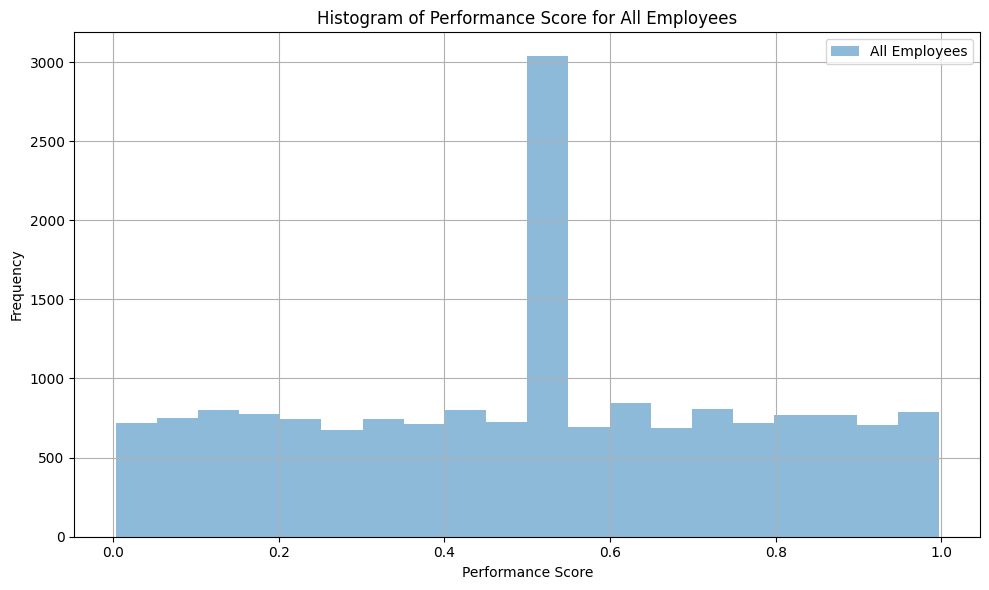

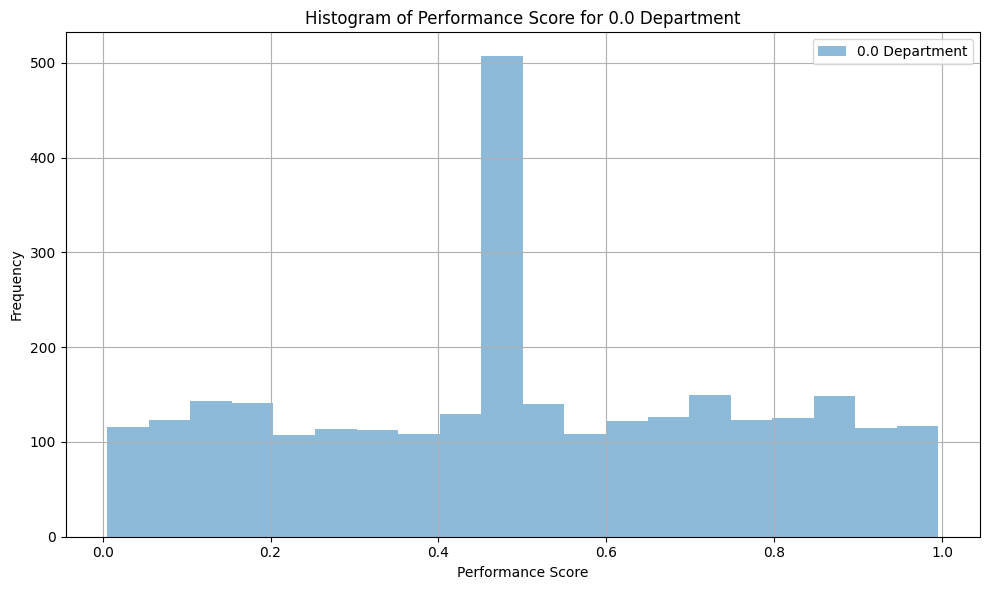

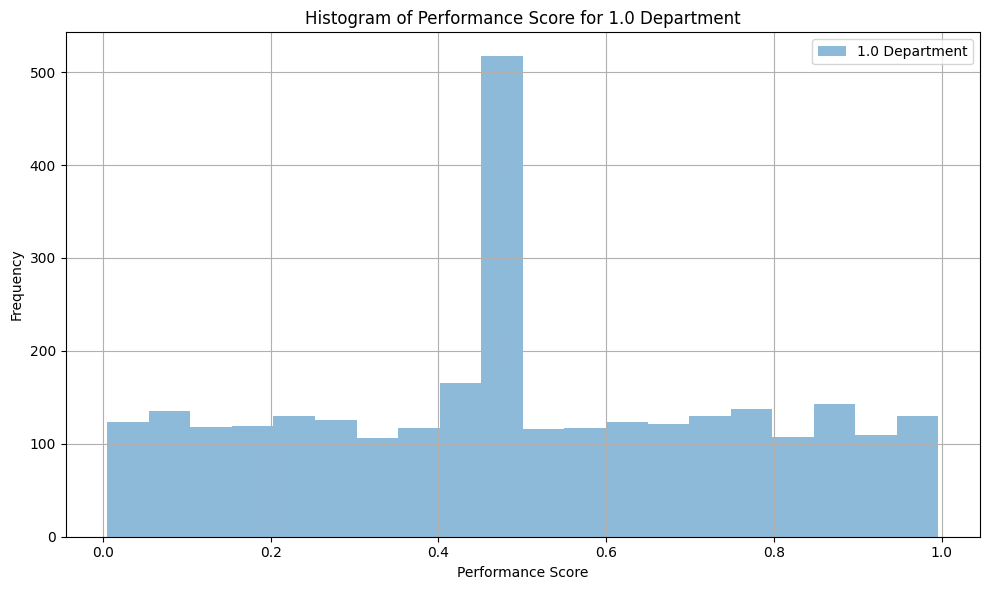

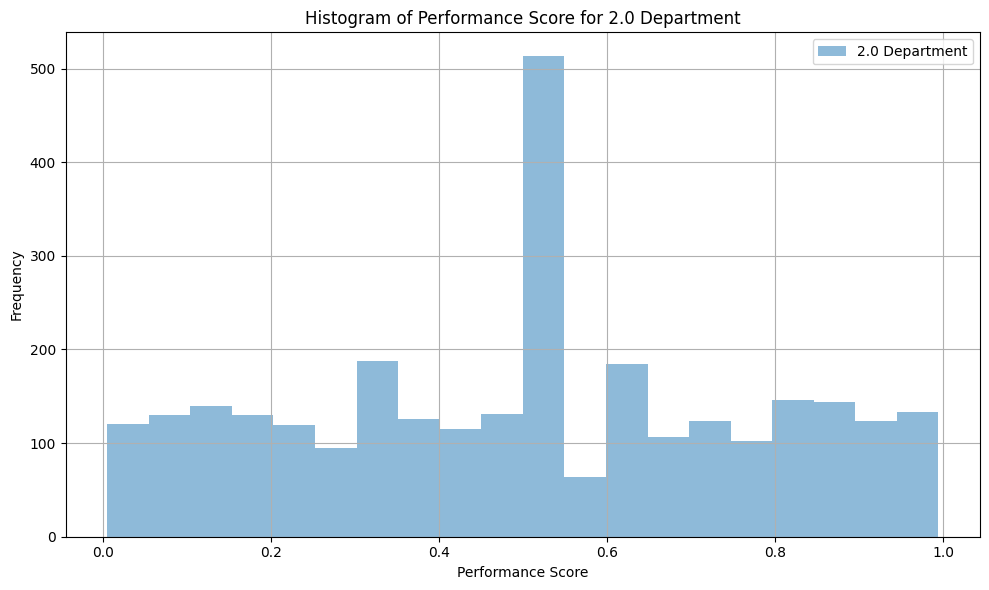

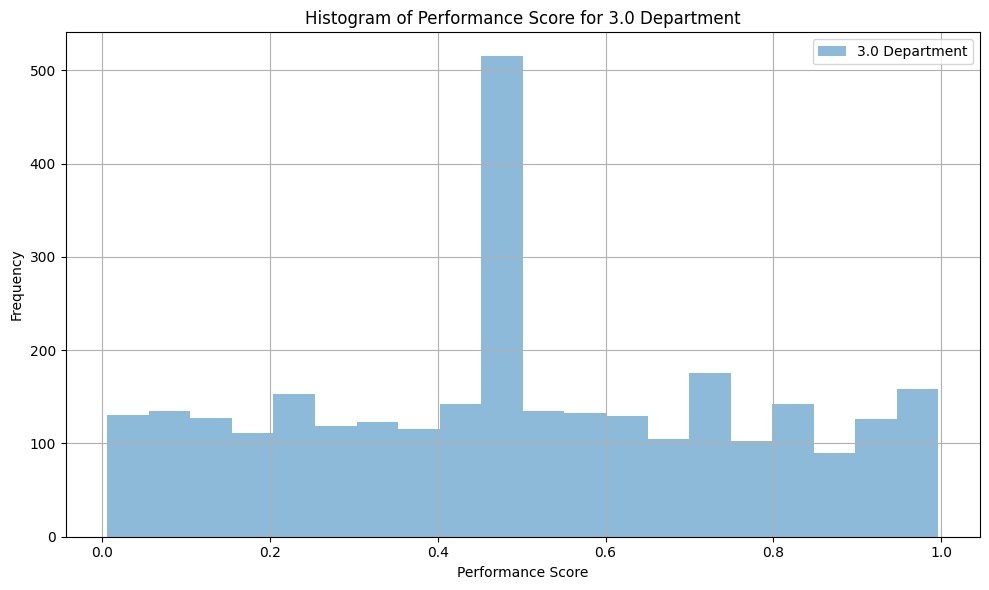

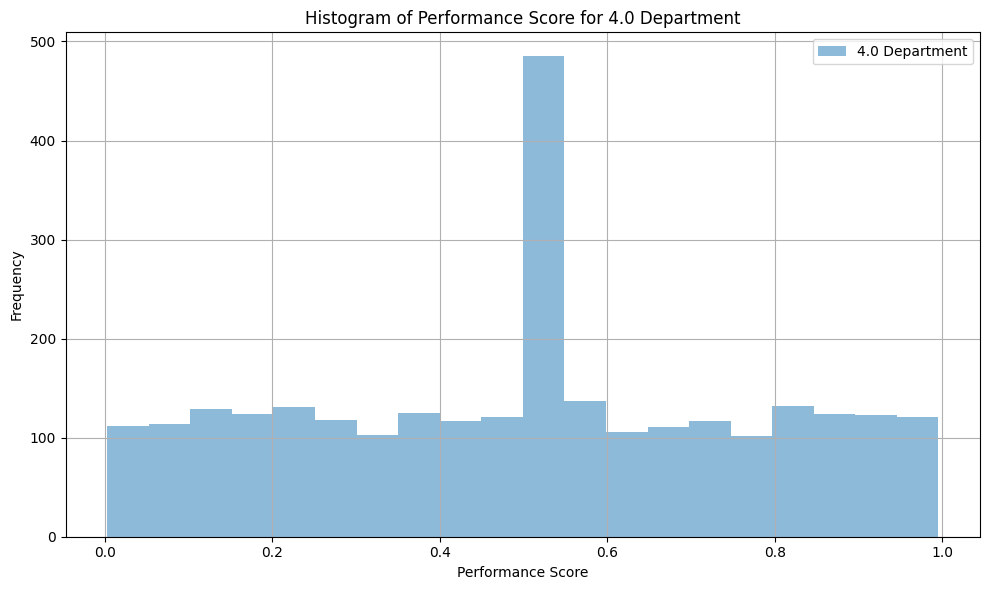

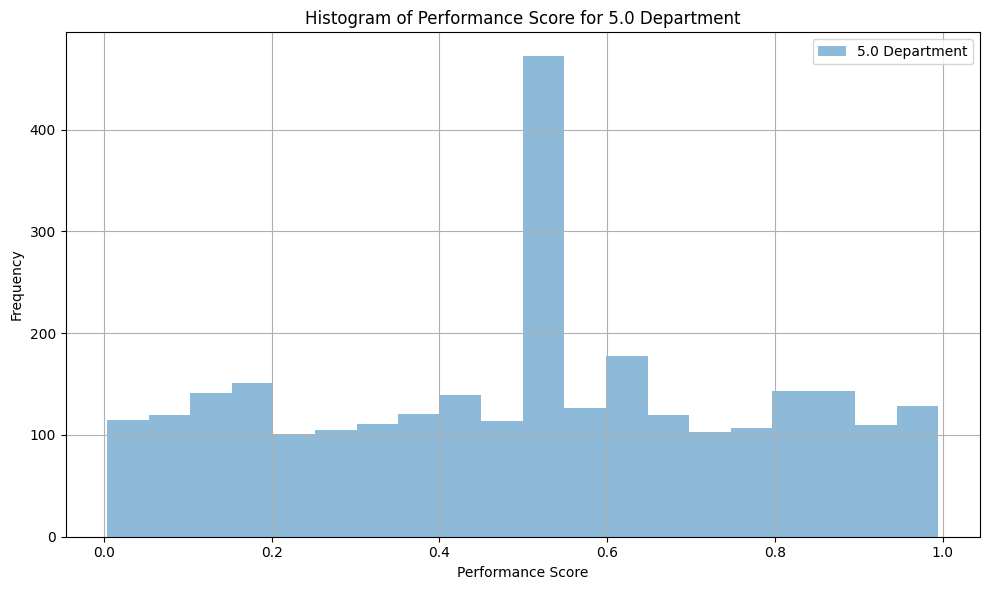

In [ ]:
import matplotlib.pyplot as plt

# Define the key performance metric with the highest correlation to turnover
key_metric = 'Performance Score'

# All Employees
plt.figure(figsize=(10, 6))
plt.hist(all_employees_slice[key_metric], bins=20, alpha=0.5, label='All Employees')
plt.title(f'Histogram of {key_metric} for All Employees')
plt.xlabel(key_metric)
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# By Department
for department, data in department_slices.items():
    plt.figure(figsize=(10, 6))
    plt.hist(data[key_metric], bins=20, alpha=0.5, label=f'{department} Department')
    plt.title(f'Histogram of {key_metric} for {department} Department')
    plt.xlabel(key_metric)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
X_train = X_train.drop(columns=['Name'])
X_val = X_val.drop(columns=['Name'])


Optional Extensions

Machine Learning Model Implementation

In this step, we implement a Random Forest Classifier for predicting employee turnover. We use the RandomForestClassifier class from the sklearn.ensemble module. The classifier is trained on the training data (X_train, y_train) using 100 decision trees (n_estimators=100) and a fixed random state (random_state=42) for reproducibility.   

Model Evaluation.  
After training the Random Forest Classifier, we make predictions on the validation set (X_val) and evaluate the model's performance. We calculate the accuracy of the model on the validation set using accuracy_score from sklearn.metrics. Additionally, we generate a classification report using classification_report to obtain detailed metrics such as precision, recall, and F1-score for each class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Print classification report
print(classification_report(y_val, y_pred))



Validation Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3455

    accuracy                           1.00      3455
   macro avg       1.00      1.00      1.00      3455
weighted avg       1.00      1.00      1.00      3455



Achieved perfect accuracy on the validation set with the Random Forest Classifier, which is quite unusual and might indicate overfitting. Some of the future work I suggest is:
- Address Class Imbalance: If my dataset is imbalanced, with one class dominating the other, consider techniques like oversampling, undersampling, or using class weights to handle the imbalance and improve model performance.
- Evaluate on Test Set: Assess the model's performance on a separate test set that the model hasn't seen before. This will provide a more reliable estimate of the model's generalization performance.
- Hyperparameter Tuning: Perform hyperparameter tuning to find the optimal parameters for the Random Forest Classifier. Can use techniques like grid search or random search to explore the hyperparameter space.
- Cross-Validation: Instead of relying on a single train-test split, consider using cross-validation to get a better estimate of the model's performance. Cross-validation helps in reducing variance and provides a more robust evaluation.


Feature Importance Analysis.  
To understand which features are most influential in predicting employee turnover, we extract feature importances from the trained Random Forest model. We plot the feature importances using a bar plot to visualize the relative importance of each feature in predicting turnover.

Feature Importance Plot: Visualize the importance of each feature in the Random Forest model. This can help you understand which features are most influential in predicting turnover.

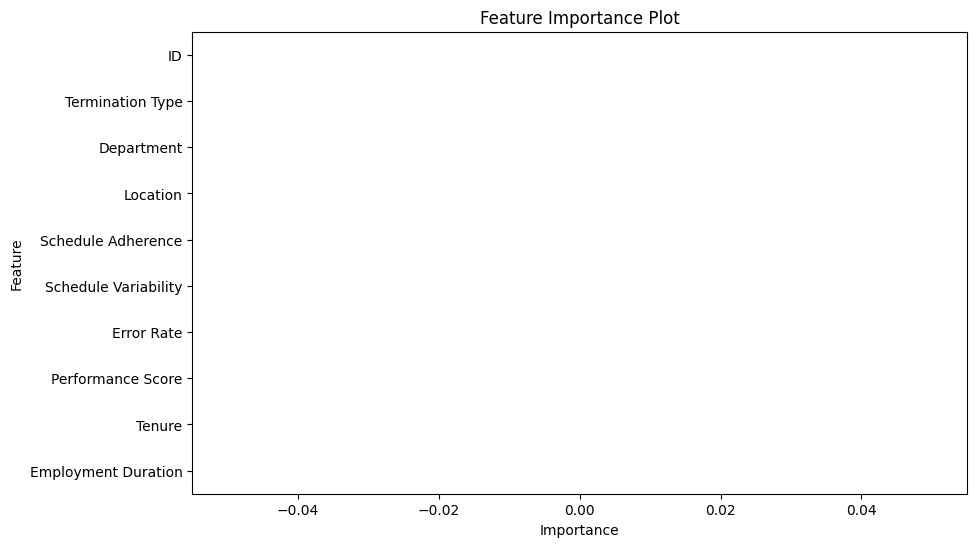

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Confusion Matrix.  

Finally, I have computed the confusion matrix to assess the performance of the model in terms of true positive, false positive, true negative, and false negative predictions. We plot the confusion matrix as a heatmap using seaborn to provide a visual representation of the model's performance.

Confusion Matrix: Visualize the confusion matrix to see the model's performance in terms of true positive, true negative, false positive, and false negative predictions.

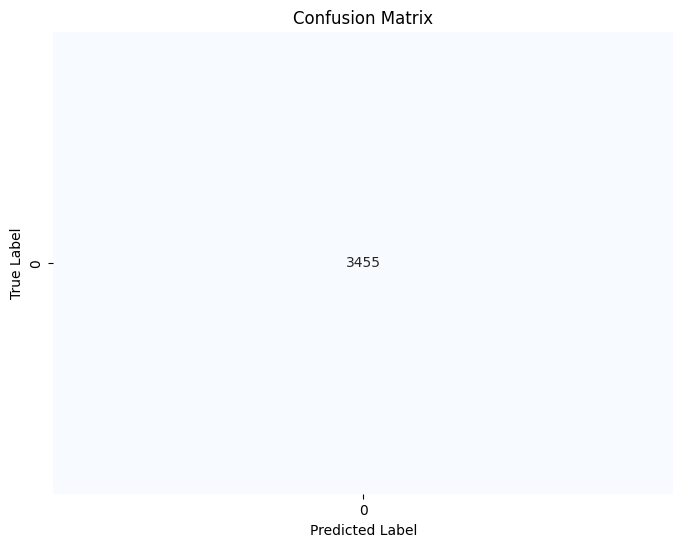

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Technical Assessment Summary:

This technical assessment focuses on analyzing and predicting employee turnover using machine learning techniques. The assessment consists of several key phases:   

Data Intake and Cleaning Phase: The initial step involves loading the required datasets from external sources (e.g., CSV files), examining for missing values, performing data cleaning tasks such as converting data types and handling duplicates.   
Data Integration Phase: This phase involves merging multiple datasets to create a unified dataset that contains relevant information for analysis and modeling.   
Data Processing and Feature Engineering Phase: In this phase, data is prepared for modeling by performing feature engineering tasks such as computing employee tenure, creating labels for turnover, generating lag features, and calculating percentiles within departments.   
Model Input Preparation Phase: The dataset is split into training, validation, and test sets. Categorical variables are encoded into numerical representations, missing values are imputed, and additional feature engineering steps may be performed.   
Analysis Phase: This phase encompasses various analyses to gain insights into turnover dynamics. It includes correlation analysis, visualization of turnover rates over time, computation of median and average tenure, and examination of key performance metrics.   
Machine Learning Model Implementation Phase: A Random Forest Classifier is implemented to predict employee turnover. The model is trained, evaluated using metrics such as accuracy and classification report, and feature importances are analyzed.   
README File: A README file is created to provide an overview of the project, instructions for running the notebook, and any additional information relevant to users.   